# getting data

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_style('darkgrid')

In [ ]:
train_set = pd.read_csv('Train.csv')
test_set = pd.read_csv('Test.csv')
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product        2452 non-null   object 
 1   Product_Brand  2452 non-null   object 
 2   Item_Category  2452 non-null   object 
 3   Subcategory_1  2452 non-null   object 
 4   Subcategory_2  2452 non-null   object 
 5   Item_Rating    2452 non-null   float64
 6   Date           2452 non-null   object 
 7   Selling_Price  2452 non-null   float64
dtypes: float64(2), object(6)
memory usage: 153.4+ KB


In [ ]:
train_set.describe(percentiles=[.25, .50, .75], include=['float64'])

,Item_Rating,Selling_Price
count,2452.000000,2452.000000
mean,3.078467,2494.375612
std,1.187137,7115.256516
min,1.000000,33.000000
25%,2.000000,371.000000
50%,3.100000,596.000000
75%,4.100000,1195.250000
max,5.000000,116289.000000


In [ ]:
train_set.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,2/3/2017,291.0
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,7/1/2015,897.0
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,1/12/2019,792.0
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.0,12/12/2014,837.0
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,12/12/2013,470.0


# data cleaning and basic feature engineering

let's merge both the sets

In [ ]:
test_set.loc[:,'Selling_Price'] = 0
test_set.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price
0,P-11284,B-2984,computers,network components,routers,4.3,1/12/2018,0
1,P-6580,B-1732,jewellery,bangles bracelets armlets,bracelets,3.0,20/12/2012,0
2,P-5843,B-3078,clothing,women s clothing,western wear,1.5,1/12/2014,0
3,P-5334,B-1421,jewellery,necklaces chains,necklaces,3.9,1/12/2019,0
4,P-5586,B-3078,clothing,women s clothing,western wear,1.4,1/12/2017,0


In [ ]:
combined_set = pd.concat([train_set, test_set])
combined_set.reset_index(drop=True, inplace=True)
combined_set.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,2/3/2017,291.0
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,7/1/2015,897.0
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,1/12/2019,792.0
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.0,12/12/2014,837.0
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,12/12/2013,470.0


let's extract information from dates

In [ ]:
combined_set.dtypes

Product           object
Product_Brand     object
Item_Category     object
Subcategory_1     object
Subcategory_2     object
Item_Rating      float64
Date              object
Selling_Price    float64
dtype: object

In [ ]:
combined_set.loc[:, 'Date_Year'] = pd.to_datetime(combined_set.loc[:, 'Date']).dt.year
combined_set.loc[:, 'Date_Month'] = pd.to_datetime(combined_set.loc[:, 'Date']).dt.month
combined_set.loc[:, 'Date_Day'] = pd.to_datetime(combined_set.loc[:, 'Date']).dt.day
combined_set.loc[:, 'Date_Dayofweek'] = pd.to_datetime(combined_set.loc[:, 'Date']).dt.dayofweek
combined_set.loc[:, 'Date_Is_weekday'] = np.where(combined_set.loc[:, 'Date_Dayofweek'].isin([0,1,2,3,4]),1,0)
combined_set.loc[:, 'Date_DayOfyear'] = pd.to_datetime(combined_set.loc[:, 'Date']).dt.dayofyear
combined_set.loc[:, 'Date_Week'] = pd.to_datetime(combined_set.loc[:, 'Date']).dt.week 
combined_set.loc[:, 'Date_Quarter'] = pd.to_datetime(combined_set.loc[:, 'Date']).dt.quarter
combined_set.loc[:, 'Date_Semester'] = np.where(combined_set.loc[:, 'Date_Quarter'].isin([1,2]),1,2)   
combined_set.loc[:, 'Date_Is_month_start'] = pd.to_datetime(combined_set.loc[:, 'Date']).dt.is_month_start 
combined_set.loc[:, 'Date_Is_month_end'] = pd.to_datetime(combined_set.loc[:, 'Date']).dt.is_month_end 
combined_set.loc[:, 'Date_Is_quarter_start'] = pd.to_datetime(combined_set.loc[:, 'Date']).dt.is_quarter_start
combined_set.loc[:, 'Date_Is_quarter_end'] = pd.to_datetime(combined_set.loc[:, 'Date']).dt.is_quarter_end 
combined_set.loc[:, 'Date_Is_year_start'] = pd.to_datetime(combined_set.loc[:, 'Date']).dt.is_year_start 
combined_set.loc[:, 'Date_Is_year_end'] = pd.to_datetime(combined_set.loc[:, 'Date']).dt.is_year_end
combined_set.loc[:, 'Date_Days_in_month'] = pd.to_datetime(combined_set.loc[:, 'Date']).dt.days_in_month

combined_set.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price,Date_Year,Date_Month,Date_Day,Date_Dayofweek,Date_Is_weekday,Date_DayOfyear,Date_Week,Date_Quarter,Date_Semester,Date_Is_month_start,Date_Is_month_end,Date_Is_quarter_start,Date_Is_quarter_end,Date_Is_year_start,Date_Is_year_end,Date_Days_in_month
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,2/3/2017,291.0,2017,2,3,4,1,34,5,1,1,False,False,False,False,False,False,28
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,7/1/2015,897.0,2015,7,1,2,1,182,27,3,2,True,False,True,False,False,False,31
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,1/12/2019,792.0,2019,1,12,5,0,12,2,1,1,False,False,False,False,False,False,31
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.0,12/12/2014,837.0,2014,12,12,4,1,346,50,4,2,False,False,False,False,False,False,31
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,12/12/2013,470.0,2013,12,12,3,1,346,50,4,2,False,False,False,False,False,False,31


In [ ]:
combined_set.dtypes

Product                   object
Product_Brand             object
Item_Category             object
Subcategory_1             object
Subcategory_2             object
Item_Rating              float64
Date                      object
Selling_Price            float64
Date_Year                  int64
Date_Month                 int64
Date_Day                   int64
Date_Dayofweek             int64
Date_Is_weekday            int64
Date_DayOfyear             int64
Date_Week                  int64
Date_Quarter               int64
Date_Semester              int64
Date_Is_month_start         bool
Date_Is_month_end           bool
Date_Is_quarter_start       bool
Date_Is_quarter_end         bool
Date_Is_year_start          bool
Date_Is_year_end            bool
Date_Days_in_month         int64
dtype: object

In [ ]:
combined_set.drop(columns=['Date'], axis=1, inplace=True)

In [ ]:
combined_set.loc[:, 'Date_Is_month_start'] = combined_set.loc[:, 'Date_Is_month_start'].astype(int)
combined_set.loc[:, 'Date_Is_month_end'] = combined_set.loc[:, 'Date_Is_month_end'].astype(int)
combined_set.loc[:, 'Date_Is_quarter_start'] = combined_set.loc[:, 'Date_Is_quarter_start'].astype(int)
combined_set.loc[:, 'Date_Is_quarter_end'] = combined_set.loc[:, 'Date_Is_quarter_end'].astype(int)
combined_set.loc[:, 'Date_Is_year_start'] = combined_set.loc[:, 'Date_Is_year_start'].astype(int)
combined_set.loc[:, 'Date_Is_year_end'] = combined_set.loc[:, 'Date_Is_year_end'].astype(int)
combined_set.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Selling_Price,Date_Year,Date_Month,Date_Day,Date_Dayofweek,Date_Is_weekday,Date_DayOfyear,Date_Week,Date_Quarter,Date_Semester,Date_Is_month_start,Date_Is_month_end,Date_Is_quarter_start,Date_Is_quarter_end,Date_Is_year_start,Date_Is_year_end,Date_Days_in_month
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,291.0,2017,2,3,4,1,34,5,1,1,0,0,0,0,0,0,28
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,897.0,2015,7,1,2,1,182,27,3,2,1,0,1,0,0,0,31
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,792.0,2019,1,12,5,0,12,2,1,1,0,0,0,0,0,0,31
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.0,837.0,2014,12,12,4,1,346,50,4,2,0,0,0,0,0,0,31
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,470.0,2013,12,12,3,1,346,50,4,2,0,0,0,0,0,0,31


text column at beginning

In [ ]:
combined_set.columns

Index(['Product', 'Product_Brand', 'Item_Category', 'Subcategory_1',
       'Subcategory_2', 'Item_Rating', 'Selling_Price', 'Date_Year',
       'Date_Month', 'Date_Day', 'Date_Dayofweek', 'Date_Is_weekday',
       'Date_DayOfyear', 'Date_Week', 'Date_Quarter', 'Date_Semester',
       'Date_Is_month_start', 'Date_Is_month_end', 'Date_Is_quarter_start',
       'Date_Is_quarter_end', 'Date_Is_year_start', 'Date_Is_year_end',
       'Date_Days_in_month'],
      dtype='object')

In [ ]:
combined_set.loc[:,['Product', 'Product_Brand', 'Item_Category', 'Subcategory_1', 'Subcategory_2']].apply(pd.Series.nunique)

Product          3503
Product_Brand    1313
Item_Category      95
Subcategory_1     142
Subcategory_2     395
dtype: int64

In [ ]:
combined_set = pd.concat([combined_set, pd.get_dummies(combined_set.loc[:,'Item_Category'], prefix='Item_Category')], axis=1, join='inner')
combined_set = pd.concat([combined_set, pd.get_dummies(combined_set.loc[:,'Subcategory_1'], prefix='Subcategory_1')], axis=1, join='inner')
combined_set = pd.concat([combined_set, pd.get_dummies(combined_set.loc[:,'Subcategory_2'], prefix='Subcategory_2')], axis=1, join='inner')
combined_set = pd.concat([combined_set, pd.get_dummies(combined_set.loc[:,'Product_Brand'], prefix='Product_Brand')], axis=1, join='inner')
combined_set.shape

(3503, 1968)

In [ ]:
combined_set.drop(columns=['Product', 'Product_Brand', 'Item_Category', 'Subcategory_1', 'Subcategory_2'], axis=1, inplace=True)
combined_set.shape

(3503, 1963)

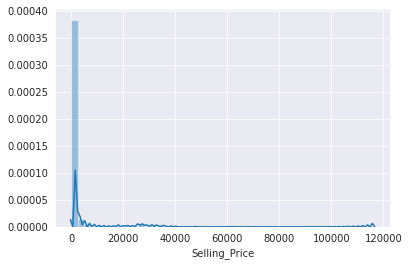

In [ ]:
sns.distplot(train_set.loc[:,'Selling_Price'])

since, this is highly skewed, let's take log of this and use it for prediction.

# developing a baseline model

In [ ]:
train_set.shape, test_set.shape

((2452, 8), (1051, 8))

In [ ]:
train_baseline = combined_set.loc[combined_set.loc[:,'Selling_Price'] != 0]
test_baseline = combined_set.loc[combined_set.loc[:,'Selling_Price'] == 0]
train_baseline.shape, test_baseline.shape

((2452, 1963), (1051, 1963))

In [ ]:
test_baseline.drop(columns=['Selling_Price'], axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_tr_bs, X_val_bs, y_tr_bs, y_val_bs = train_test_split(train_baseline.loc[:, train_baseline.columns != 'Selling_Price'],
                                                        train_baseline.loc[:,'Selling_Price'],
                                                        test_size=0.05, random_state=2, shuffle=True)

X_tr_bs.shape, X_val_bs.shape, y_tr_bs.shape, y_val_bs.shape

((2329, 1962), (123, 1962), (2329,), (123,))

In [ ]:
y_tr_bs = np.log1p(y_tr_bs)
y_val_bs = np.log1p(y_val_bs)

# Light GBM

In [ ]:
import lightgbm as lgb

In [ ]:
tr_bs = lgb.Dataset(data=X_tr_bs, label=y_tr_bs)
val_bs = lgb.Dataset(data=X_val_bs, label=y_val_bs)

In [ ]:
lgbm = lgb.train({'objective': 'regression', 'metric':'rmse', 'num_iterations':30_000, 'learning_rate':0.01, 'num_leaves': 80, 'max_depth': -1,
                  'min_data_in_leaf': 11, 'bagging_fraction': 0.80, 'bagging_freq': 1, 'bagging_seed': 3, 'feature_fraction': 0.80,
                  'feature_fraction_seed': 2, 'early_stopping_round': 1_00, 'max_bin': 250},
                 train_set=tr_bs, early_stopping_rounds=500, verbose_eval=100, valid_sets=[val_bs])

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 500 rounds.
[100]	valid_0's rmse: 0.788201
[200]	valid_0's rmse: 0.701451
[300]	valid_0's rmse: 0.693964
[400]	valid_0's rmse: 0.695452
[500]	valid_0's rmse: 0.698235
[600]	valid_0's rmse: 0.699912
[700]	valid_0's rmse: 0.702362
Early stopping, best iteration is:
[270]	valid_0's rmse: 0.692068


# XGBoost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb_regressor = XGBRegressor(max_depth=6, learning_rate =0.01, n_estimators=5000, colsample_bytree=0.8, seed=100)

In [ ]:
xgb_regressor.fit(X=X_tr_bs, y=y_tr_bs, eval_set=[(X_val_bs, y_val_bs)], eval_metric='rmse', early_stopping_rounds=100, verbose=100)

[11:52:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:6.1042
Will train until validation_0-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:2.34371
[200]	validation_0-rmse:1.06075
[300]	validation_0-rmse:0.734569
[400]	validation_0-rmse:0.672544
[500]	validation_0-rmse:0.660872
[600]	validation_0-rmse:0.6499
[700]	validation_0-rmse:0.641471
[800]	validation_0-rmse:0.63317
[900]	validation_0-rmse:0.626097
[1000]	validation_0-rmse:0.620671
[1100]	validation_0-rmse:0.616408
[1200]	validation_0-rmse:0.612873
[1300]	validation_0-rmse:0.609857
[1400]	validation_0-rmse:0.606307
[1500]	validation_0-rmse:0.603688
[1600]	validation_0-rmse:0.601092
[1700]	validation_0-rmse:0.598348
[1800]	validation_0-rmse:0.596424
[1900]	validation_0-rmse:0.594463
[2000]	validation_0-rmse:0.591861
[2100]	validation_0-rmse:0.59029
[2200]	validation_0-rmse:0.588808
[2300]	validation_0-rmse:0.587163
[2400]	vali

XGBRegressor(base_score=0.692, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eval_metric='rmse',
             gamma=0, importance_type='gain', learning_rate=0.01,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
             n_estimators=5000, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=100, silent=None, subsample=1, verbosity=1)

In [ ]:
pred_rmse = xgb_regressor.predict(test_baseline)

In [ ]:
pred_rmse[:10]

array([ 7.8156986,  6.1787715,  6.458216 ,  5.891113 ,  6.4573264,
        6.4620876,  5.9405274,  9.45745  , 10.113113 ,  5.779466 ],
      dtype=float32)

# CatBoost

In [ ]:
from catboost import CatBoostRegressor

In [ ]:
cbr=CatBoostRegressor(iterations=5_000, learning_rate=0.01, loss_function='RMSE', random_seed=100)

In [ ]:
cbr.fit(X=X_tr_bs, y=y_tr_bs, eval_set=(X_val_bs, y_val_bs))

Streaming output truncated to the last 5000 lines.
6:	learn: 1.1384348	test: 1.1974084	best: 1.1974084 (6)	total: 86.4ms	remaining: 1m 1s
7:	learn: 1.1333874	test: 1.1916987	best: 1.1916987 (7)	total: 91.7ms	remaining: 57.2s
8:	learn: 1.1287709	test: 1.1863870	best: 1.1863870 (8)	total: 96.9ms	remaining: 53.7s
9:	learn: 1.1237786	test: 1.1804680	best: 1.1804680 (9)	total: 102ms	remaining: 50.9s
10:	learn: 1.1190073	test: 1.1752259	best: 1.1752259 (10)	total: 107ms	remaining: 48.7s
11:	learn: 1.1140151	test: 1.1694371	best: 1.1694371 (11)	total: 114ms	remaining: 47.6s
12:	learn: 1.1092678	test: 1.1640289	best: 1.1640289 (12)	total: 125ms	remaining: 47.9s
13:	learn: 1.1045732	test: 1.1579574	best: 1.1579574 (13)	total: 134ms	remaining: 47.8s
14:	learn: 1.1001058	test: 1.1528803	best: 1.1528803 (14)	total: 144ms	remaining: 47.9s
15:	learn: 1.0957302	test: 1.1478330	best: 1.1478330 (15)	total: 149ms	remaining: 46.5s
16:	learn: 1.0909719	test: 1.1420315	best: 1.1420315 (16)	total: 154ms	rem

# best model was xgboost with rmse=0.566643 on validation set.